In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
# Check if the available data fit a 2D Gaussian function.
def gaussian_2d(X, A, mu_x, mu_y, sigma):
    x, y = X
    return A * np.exp(-((x - mu_x)**2 + (y - mu_y)**2) / (2 * sigma**2))

In [3]:
# Provided input values
input_values = np.array([
    [0., 0.999999],
    [0.428695, 0.863644],
    [0.811097, 0.08113],
    [0.107578, 0.790639],
    [0.107578, 0.790639],
    [0.529339, 0.341418],
    [0.187554, 0.343872],
    [0.142, 0.3499],
    [0.34, 0.214],
    [0.339, 0.2135],
    [0.391382, 0.164898],
    [0.007778, 0.675174],
    [0.584557, 0.757165],
    [0.142699, 0.349005],
    [0.592845, 0.844266],
    [0.591457, 0.053294],
    [0.720123, 0.917558],
    [0.778338, 0.997582],
    [0.651233, 0.717866],
    [0.999999, 0.999999],
    [0.870851, 0.62075],
    [0.582059, 0.864052],
    [0.918774, 0.856499],
    [0.35685, 0.546836],
    [0.66579958, 0.12396913],
    [0.87779099, 0.7786275],
    [0.14269907, 0.34900513],
    [0.84527543, 0.71112027],
    [0.45464714, 0.29045518],
    [0.57771284, 0.77197318],
    [0.43816606, 0.68501826],
    [0.34174959, 0.02869772],
    [0.33864816, 0.21386725],
    [0.70263656, 0.9265642],
    [0.33162594, 0.08049911],
    [0.10053279, 0.47759524],
    [0.67793216, 0.87370355],
    [0.13495584, 0.52115767],
    [0.53715567, 0.24471459],
    [0.6591284, 0.63064156],
    [0.47045207, 0.53376825],
    [0.72120239, 0.36450644],
    [0.7227338, 0.43801822],
    [0.24066761, 0.14122907]
])

# Provided output values
output_values = np.array([
    0.03436578, 0.0663414, -0.07251552, -0.13215936, 0.11684056,
    0.46557414, -0.13370339, 0.06956699, 0.09555004, 0.03727626,
    0.01428215, -0.00943343, 0.04006442, -0.06792504, 0.12817877,
    0.09544223, 0.52253579, 0.12190412, 0.42480596, 0.12713227,
    0.51915215, 0.12995227, 0.11141464, 0.06272086, 0.53899612,
    0.42058624, -0.06562362, 0.29399291, 0.21496451, 0.02310555,
    0.24461934, 0.03874902, -0.01385762, 0.61120522, -0.02995427,
    0.08311962, 0.56114332, 0.01347696, 0.38994406, 0.42201818,
    0.58695686, 0.56954976, 0.69483209, 0.03376806
])

In [4]:
# Mask to use only positive values for fitting
mask = output_values > 0
input_values = input_values[mask]
output_values = output_values[mask]


In [5]:
# Perform the curve fitting
popt, _ = curve_fit(gaussian_2d, (input_values[:, 0], input_values[:, 1]), output_values, p0=[1, 0.65, 0.65, 0.1])

A, mu_x, mu_y, sigma = popt
print(f"Fitted parameters: A={A}, mu_x={mu_x}, mu_y={mu_y}, sigma={sigma}")

Fitted parameters: A=0.6573420272487773, mu_x=0.8458197577727973, mu_y=0.44833101088286825, sigma=0.32073020049178663


In [6]:
# Calculate the predicted values
predicted_values = gaussian_2d((input_values[:, 0], input_values[:, 1]), A, mu_x, mu_y, sigma)

# Calculate residuals
residuals = output_values - predicted_values

# Calculate R-squared value
ss_res = np.sum(residuals**2)
ss_tot = np.sum((output_values - np.mean(output_values))**2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R-squared: {r_squared}")

R-squared: 0.5196455307018881


R-squared is not great but let's go with it

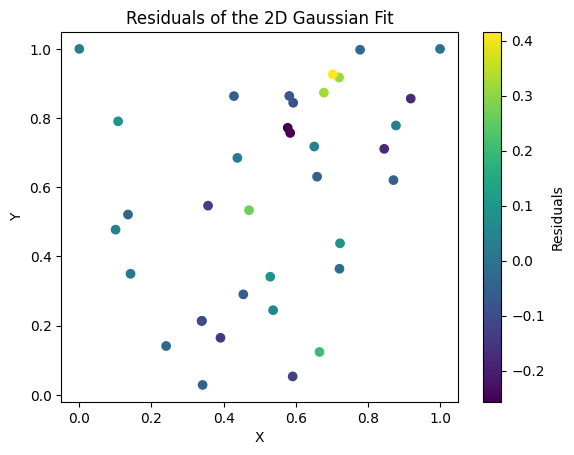

In [7]:
# Plot the residuals
plt.figure()
plt.scatter(input_values[:, 0], input_values[:, 1], c=residuals, cmap='viridis', marker='o')
plt.colorbar(label='Residuals')
plt.title('Residuals of the 2D Gaussian Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

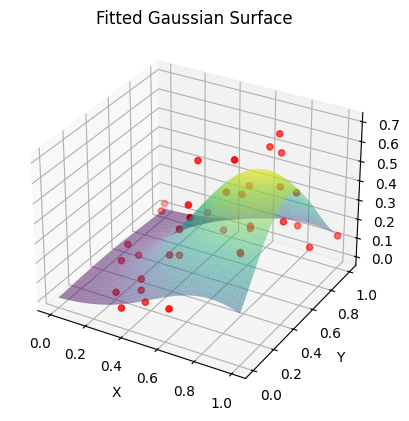

In [8]:
# Plot the fitted surface
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
x, y = np.meshgrid(x, y)
z = gaussian_2d((x, y), A, mu_x, mu_y, sigma)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', alpha=0.5)
ax.scatter(input_values[:, 0], input_values[:, 1], output_values, color='r')
ax.set_title('Fitted Gaussian Surface')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

Not a great curve!